<a href="https://colab.research.google.com/github/AdityaGitHubPro/Titanic-Challenge/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

The sinnking of the **RMS Titanic** is one of the most infamous shipwrecks in histroyy. ON **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killinng 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety reguylation for ships.

One of the reasons that the shipwrek led to such loss of life was not enough lifeboats for the passengers and crew. Although there was some elements of luck involved in surviving the sinking. Some groups of people were more likely to survive that others, such as women, children, and the upper-class. 

In this challenge, we target to complete the anlaysis of what sorts of people were likely to survive.

## **DataSet:** https://drive.google.com/file/d/1YJr3Drtn0giGn4YFdpOwLkpa2xWfx3RD/view?usp=share_link



In [62]:
from traitlets.utils.importstring import import_item
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)} )

# **Loading Dataset**

In [63]:
data = pd.read_csv('/content/drive/MyDrive/Data Set Of Machine Learning/titanic.csv')

In [64]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Types of Features:**

*   **Categorial** - Sex and Embarked
*   **Continous** - Age Fare
*   **Discrate** - SubSp Parch
*   **Alphanumeric** - Cabin





In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Numerical Value Analysis**

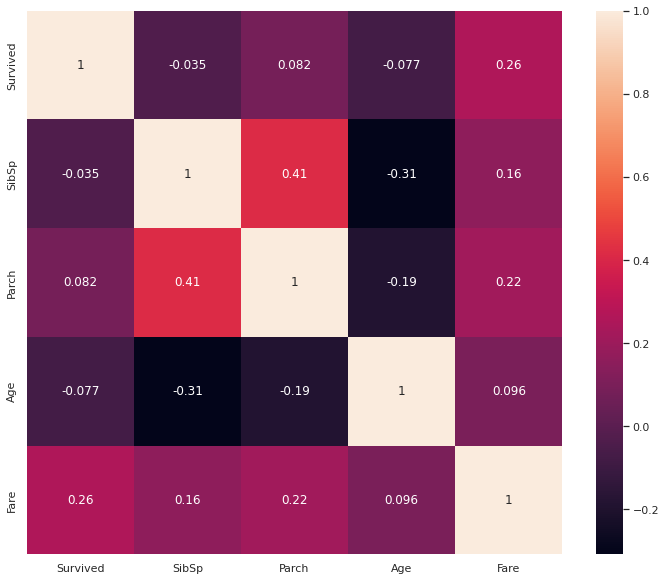

In [68]:
heatmap = sns.heatmap(data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot=True)

### **Conclusion:**

Only Fare feature seems to have a significative correlation with the survival probabilty.

It doesn't mean that the other featuresare not usefull. Subpopulations in these features can be correlated with the survial. To determine this, we need to explore in detail these feature

## **SibSp - number of Siblings / Spouses aboard the Titanic**

In [69]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


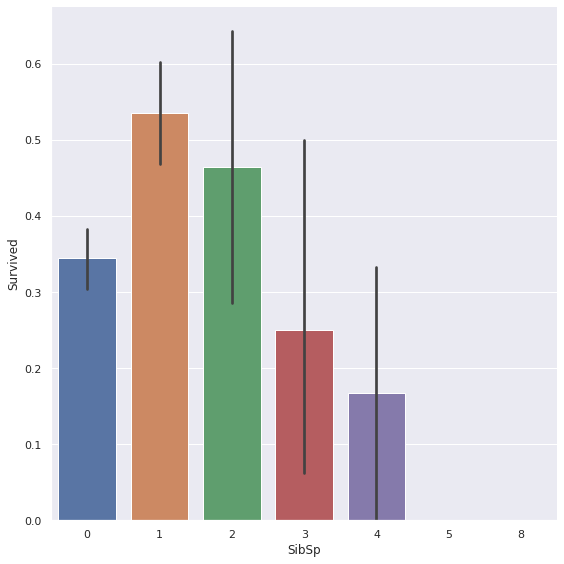

In [70]:
bargraph_sibsp = sns.factorplot(x="SibSp", y="Survived", data=data, kind="bar",size=8)

It seems that passengers having a lot of siblings/spouses have less chace to survive. 

Single passengers ( 0 SibSp) or with two persons (SibSp 1 or 2) have more chance to survive.

## **Age**

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


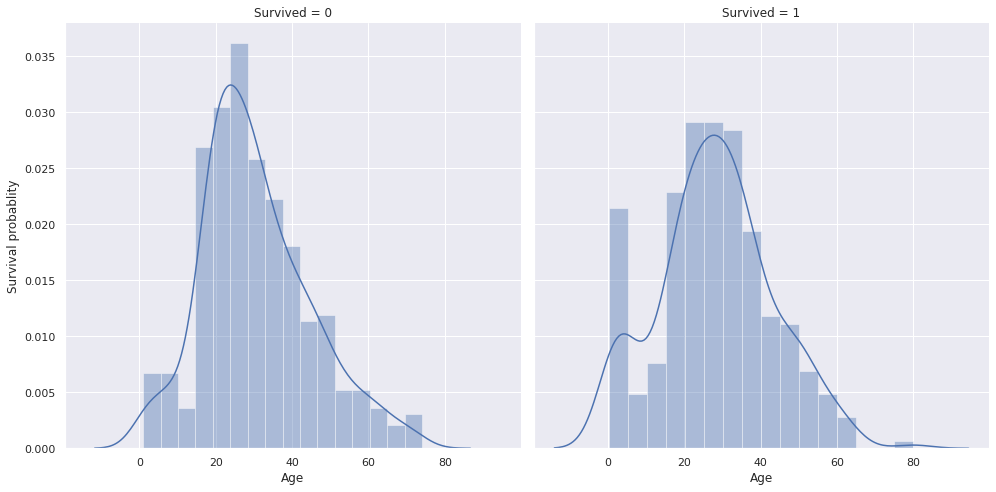

In [71]:
age_visual = sns.FacetGrid(data, col = "Survived", size=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("Survival probablity")

Age distribution seems to be tailed distribution, maybe a gaussian distribution.
We notice that age distrubutions are not the same in the survived and not survivd subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correalted with "Survived". We can see that there is age categories of passengers that of have more of less chance to Survive. 

It seems that very young passengers have more chance to survive.

# **Sex**

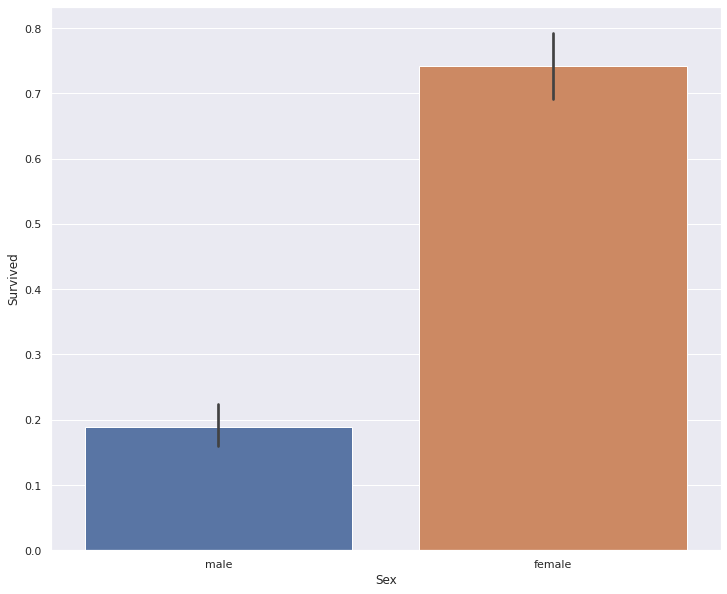

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sex_plot = sns.barplot(x="Sex", y="Survived", data=data)

In [73]:
data[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie(1997). I am sure, we all remember this sentence during the evacuation - **Women and children first**

## **PClass**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


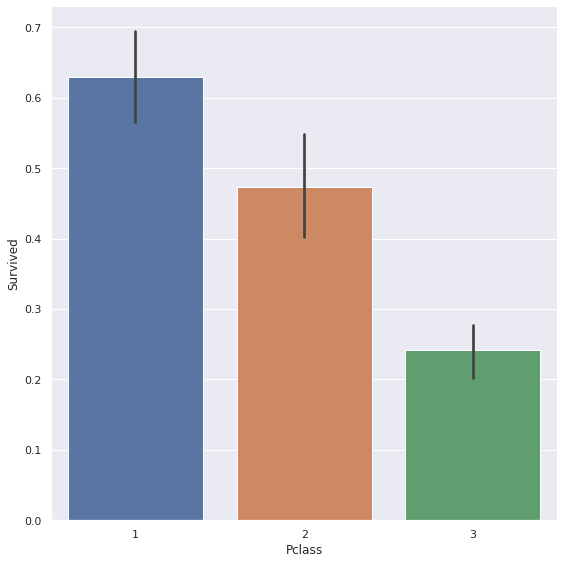

In [74]:
pclass = sns.factorplot(x="Pclass", y="Survived", data=data, kind="bar", size=8)

## **Pclass vs Survived by Sex**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


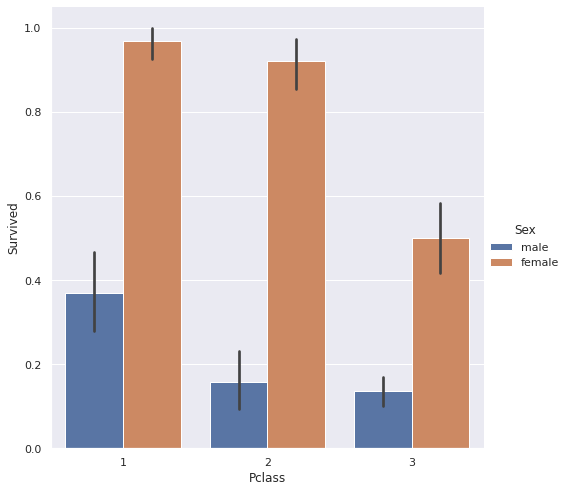

In [75]:
a=sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data, size=7, kind="bar")

## **Embarked**

In [76]:
data["Embarked"].isnull().sum()

2

In [77]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
data["Embarked"]=data["Embarked"].fillna('S')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


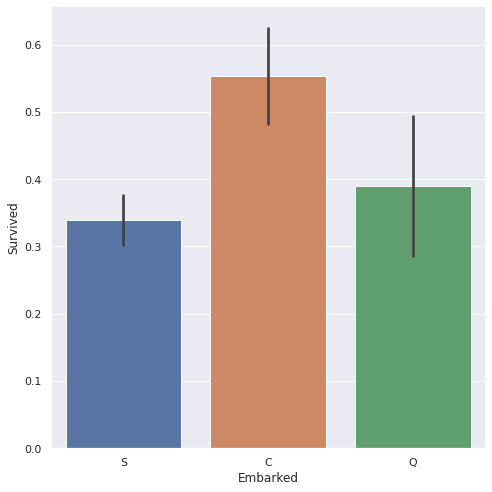

In [79]:
sns.factorplot(x="Embarked", y="Survived", data=data, size=7, kind="bar")

Passenger coming from Cherbourg(C have more chance to survive)

## **Let's find the reason**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


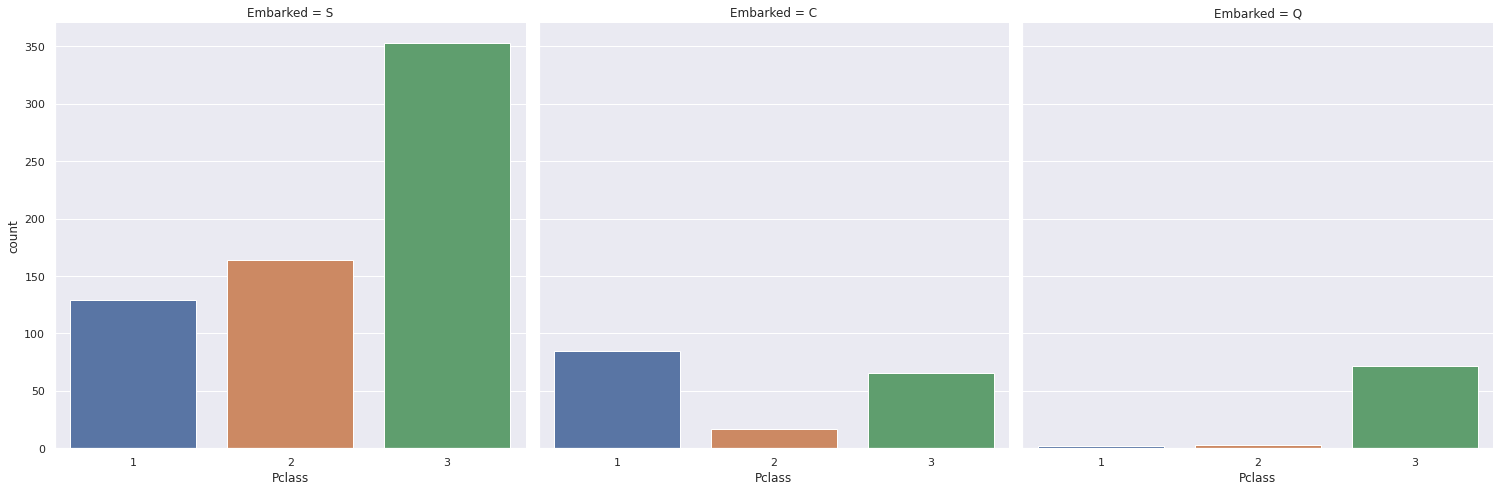

In [80]:
sns.factorplot("Pclass", col="Embarked", data=data, size=7, kind="count")

Cherbourg passengers are mostly in first class which have the highest survival rate.

## **Preparing Data**

In [81]:
data=pd.read_csv('/content/drive/MyDrive/Data Set Of Machine Learning/titanic.csv')

In [82]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
mean = data["Age"].mean()
std=data["Age"].std()
is_null=data["Age"].isnull().sum()

rand_age=np.random.randint(mean - std, mean + std, size=is_null)
age_slice=data["Age"].copy()

age_slice[np.isnan(age_slice)] = rand_age
data["Age"]=age_slice

In [85]:
data["Age"].isnull().sum()

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
data["Embarked"]=data["Embarked"].fillna("S")

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
col_to_drop = ["PassengerId", "Cabin", "Name", "Ticket"]
data.drop(col_to_drop, axis=1, inplace=True)

In [90]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [91]:
genders = {"male":0, "female":1}
data["Sex"]=data["Sex"].map(genders)

In [92]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,24.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [93]:
ports={"S":0, "C":1, "Q":2}

data["Embarked"]=data["Embarked"].map(ports)

In [94]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,24.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


## **Splitting Data**

In [95]:
x=data.drop(data.columns[[0]], axis=1) 
y=data["Survived"]

In [96]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [97]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.30, random_state = 0)

## **Feature Scaling**

In [98]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

## **Classification**

In [99]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state = 0)

In [100]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [101]:
logreg_pred = logreg.predict(xtest)
svc_classifier_pred = svc_classifier.predict(xtest)
dt_classifier_pred = dt_classifier.predict(xtest)
knn_classifier_pred = knn_classifier.predict(xtest)
rf_classifier_pred = rf_classifier.predict(xtest)

In [102]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, logreg_pred)

0.8059701492537313

In [103]:
accuracy_score(ytest, svc_classifier_pred)

0.8134328358208955

In [104]:
accuracy_score(ytest, dt_classifier_pred)

0.7649253731343284

In [105]:
accuracy_score(ytest, knn_classifier_pred)

0.7910447761194029

In [106]:
accuracy_score(ytest, rf_classifier_pred)

0.8246268656716418